# Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms

In this document, we are replicating the work by S.Sim,P.D.Johnson and A.Aspuru-Guzik *Adv.Quantum.Technol.* **2** 1900070 (2019): https://arxiv.org/abs/1905.10876

Consider a parameterized quantum circuit $U(\mathbf{x})$, and define the quantity
$$f(\mathbf{x},\mathbf{y}) = |\langle 0 | U^{\dagger}(\mathbf{y})U(\mathbf{x})|0\rangle|^{2}$$
This quantity is the fidelity of the two states
$$\begin{align*}
|\psi_{\mathbf{x}}\rangle = U(\mathbf{x})|0\rangle~~&\text{and}~~|\psi_{\mathbf{y}}\rangle = U(\mathbf{y})|0\rangle:\\
|\langle \psi_{\mathbf{y}}|\psi_{\mathbf{x}}\rangle|^{2} &= |\langle 0 |U^{\dagger}(\mathbf{y})U(\mathbf{x})|0\rangle|^{2}.
\end{align*}$$

In [1]:
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute,assemble,QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector

provider = IBMQ.load_account()


import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

C:\Users\Saesun Kim\anaconda3\envs\name_of_my_env\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Idle Circuit

In [2]:
backend = Aer.get_backend('qasm_simulator')
nshot=2000
fedelity=[]    
for x in range(nshot):
    th=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.i(qr[0])
    qc.i(qr[0])
    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count:
        ratio=count['0']/nshot
    else:
        ratio=0
    fedelity.append(ratio)


NameError: name 'random' is not defined

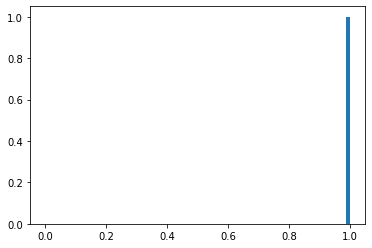

In [248]:
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights, range=[0, 1])
plt.show()

In [ ]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)


$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

$$
R_\phi = \begin{bmatrix} e^{\frac{-i \phi }{2}} & 0 \\ 0 & e^{\frac{i \phi }{2}} \end{bmatrix}
$$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} e^{\frac{-i \phi }{2}} & 0 \\ 0 & e^{\frac{i \phi }{2}} \end{bmatrix} * \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} e^{-\frac{1}{2} (i \phi )} & e^{-\frac{1}{2} (i \phi )} \\ e^{\frac{i \phi }{2}}  & -e^{\frac{i \phi }{2}} \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* (e^{-\frac{1}{2} (i \phi )}|0\rangle +e^{\frac{i \phi }{2}}|1\rangle) $$





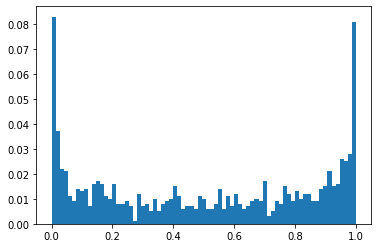

In [5]:
from random import seed
from random import random
import cmath
j=(-1)**(1/2)

backend = Aer.get_backend('qasm_simulator')
nshot=1000
fedelity=[]    
for x in range(nshot):
    th1=2*pi*random()
    th2=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.rz(th1, qr[0])
    qc.rz(th2, qr[0])
    qc.h(qr[0])
    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count and '1' in count:
        ratio=count['0']/nshot
    elif '0' in count and '1' not in count:
        ratio=count['0']/nshot
    else:
        ratio=0

    
    fedelity.append(ratio)
    
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights)
plt.show()

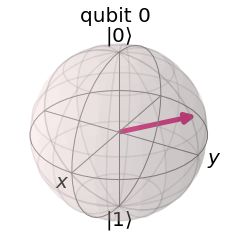

In [251]:
th=2*pi*random()
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.rz(th, qr[0])
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

$$ H = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

$$
R_\phi = \begin{bmatrix} e^{\frac{-i \phi }{2}} & 0 \\ 0 & e^{\frac{i \phi }{2}} \end{bmatrix}
$$

$$
R_{x\theta} = \begin{bmatrix} cos(\theta/2) & -i sin(\theta/2) \\ -i sin(\theta/2) & cos(\theta/2) \end{bmatrix}
$$




$$\tfrac{1}{\sqrt{2}}*\begin{bmatrix} cos(\theta/2) & -i sin(\theta/2) \\ -i sin(\theta/2) & cos(\theta/2) \end{bmatrix}* \begin{bmatrix} e^{\frac{-i \phi }{2}} & 0 \\ 0 & e^{\frac{i \phi }{2}} \end{bmatrix} * \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* \begin{bmatrix} \cos \left(\frac{\theta -\phi }{2}\right)-i \sin \left(\frac{\theta +\phi }{2}\right) &
\cos \left(\frac{\theta +\phi }{2}\right)+i \sin \left(\frac{\theta -\phi }{2}\right) \\ \cos \left(\frac{\theta +\phi }{2}\right)-i \sin \left(\frac{\theta -\phi }{2}\right) &-\cos \left(\frac{\theta -\phi }{2}\right)-i \sin \left(\frac{\theta +\phi }{2}\right) \end{bmatrix} |0\rangle  $$

$$\tfrac{1}{\sqrt{2}}* (\cos \left(\frac{\theta -\phi }{2}\right)-i \sin \left(\frac{\theta +\phi }{2}\right)|0\rangle +\cos \left(\frac{\theta +\phi }{2}\right)-i \sin \left(\frac{\theta -\phi }{2}\right) |1\rangle) $$


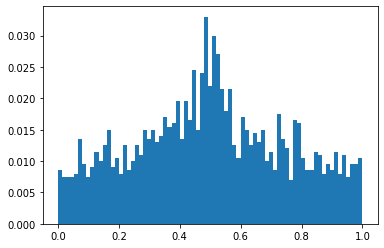

In [8]:
backend = Aer.get_backend('qasm_simulator')
nshot=2000
fedelity=[]    
for x in range(nshot):
    th1=2*pi*random()
    th2=2*pi*random()
    
    th3=2*pi*random()
    th4=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.rz(th1, qr[0])
    qc.rx(th2, qr[0])
    
    qc.rx(-th3, qr[0])

    qc.rz(-th4, qr[0])
    
    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=nshot)
    result = job.result()
    count =result.get_counts()

    if '0' in count and '1' in count:
        ratio=count['0']/nshot
    elif '0' in count and '1' not in count:
        ratio=count['0']/nshot
    else:
        ratio=0
    
    fedelity.append(ratio)
    
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights)
plt.show()

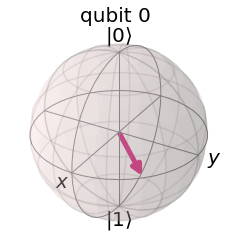

In [156]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
th1=pi/4
th2=0*pi/6
qc.h(qr[0])
qc.rz(th1, qr[0])
qc.rx(th2, qr[0])
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [47]:
qc = QuantumCircuit(1)
qc.u3(pi/2,pi/2,pi/2,0)
qc.draw()

<ipython-input-47-ebed3155adb5>:2: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(pi/2,pi/2,pi/2,0)


┌─────────────────┐
q_0: ┤ U3(π/2,π/2,π/2) ├
     └─────────────────┘

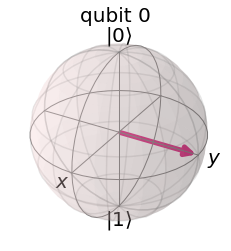

In [48]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

$$
U = \begin{bmatrix} 
cos(\theta/2)
& -e^{i \lambda} sin(\theta/2)
\\ e^{i \phi} sin(\theta/2)
& e^{i \phi+ \lambda} cos(\theta/2) \end{bmatrix}
$$

<ipython-input-9-3b5291a35832>:15: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(th1,th2,th3, qr[0])


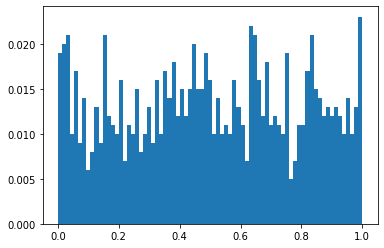

In [9]:
backend = Aer.get_backend('qasm_simulator')
nshot=1000
fedelity=[]    
for x in range(nshot):
    th1=2*pi*random()
    th2=2*pi*random()
    th3=2*pi*random()
    th4=2*pi*random()
    th5=2*pi*random()
    th6=2*pi*random()
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr[0])
    qc.u3(th1,th2,th3, qr[0])
    qc.u3(-th4,-th5,-th6, qr[0])
    qc.h(qr[0])

    qc.measure(qr[0],cr[0])
    job = execute(qc, backend, shots=1000)
    result = job.result()
    count =result.get_counts()

    if '0' in count and '1' in count:
        ratio=count['0']/nshot
    elif '0' in count and '1' not in count:
        ratio=count['0']/nshot
    else:
        ratio=0
    
    fedelity.append(ratio)
    
weights = np.ones_like(fedelity)/float(len(fedelity))
plt.hist(fedelity, bins=75, weights=weights)
plt.show()